In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pdf import PdfPages
from datetime import date
import seaborn as sns
from datetime import date, timedelta, datetime
import os
import common_functions as cf
from math import ceil
import matplotlib.dates as mdates
import numpy as np
sns.set()

In [2]:
folder_path = "C:\\Users\\Hannah Nevel\\Documents\\Weekly Reporting - CM\\Reporting for Andy"

# define file paths and import data as dataframes
investments_filepath1 = folder_path + "\\Investments October 2023.xlsx"
investments_filepath2 = folder_path + "\\Investments December 2023.xlsx"
conversions_filepath1 = folder_path+ "\\Conversions October 2023.xlsx"
conversions_filepath2 = folder_path+ "\\Conversions December 2023.xlsx"
phoneburner_filepath1 = folder_path + "\\usage - October 2023.csv"
phoneburner_filepath2 = folder_path + "\\usage - December 2023.csv"
newlead_count_filepath1 = folder_path +  "\\Leads October 2023.xlsx"
newlead_count_filepath2 = folder_path +  "\\Leads December 2023.xlsx"
touched_count_filepath1 = folder_path + "\\October 2023 Accounts Touched.xlsx"
touched_count_filepath2 = folder_path + "\\December 2023 Accounts Touched.xlsx"

investment_data_oct = pd.read_excel(investments_filepath1)
investment_data_dec = pd.read_excel(investments_filepath2)

conversion_list_oct = pd.read_excel(conversions_filepath1)
conversion_list_dec = pd.read_excel(conversions_filepath2)

phone_data_oct = pd.read_csv(phoneburner_filepath1)
phone_data_dec = pd.read_csv(phoneburner_filepath2)

newlead_data_oct = pd.read_excel(newlead_count_filepath1)
newlead_data_dec = pd.read_excel(newlead_count_filepath2)

acctstouched_data_oct = pd.read_excel(touched_count_filepath1)
acctstouched_data_dec = pd.read_excel(touched_count_filepath2)

c:\Users\Hannah Nevel\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\Hannah Nevel\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\Hannah Nevel\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\Hannah Nevel\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no de

In [3]:
investment_data_dec.head()

,Stage,Account Name,Confirmed Email Addresses,Total Investment,Total Invested,Investment: Created Date,Signature Date,Escrow Funds Received,Close Date,Type,Investment: Record Type,Promised Conversion Date,Account ID,Investment Id,Conversion Child ID,Closer,Investment Owner
0,Created,Herbert Fritz,coveheaven818@gmail.com,100000,406000,12/7/2023,12/7/2023,NaN,NaN,Roth IRA,D - Series X-1,NaN,0014P00004Abzqr,657221b9fd828994faf9634b,NaN,Matt Willer,Matt Willer
1,Created,Louis Bozzuto,lbozzuto1@att.net,503000,1004000,12/7/2023,11/16/2023,NaN,NaN,Joint,D - Series U,NaN,0014P000043nhfh,657231359e09685e49ef0b32,NaN,Matt Willer,Matt Willer
2,Created,Vannak Lim,vannaklim936@gmail.con,600000,100000,12/8/2023,12/8/2023,NaN,NaN,Individual,D - Series W-1,NaN,001Qq0000047SwX,65736d071085735b5a7b6aa4,NaN,Matt Willer,Devin Graves
3,Created,Thomas Scala,thomasscala@getpkr.com,100000,0,12/11/2023,12/11/2023,NaN,NaN,Individual,D - Series U,NaN,001Qq000004D8Or,6577557625613266ba7cdcc3,NaN,Matt Willer,Carlos Castellanos
4,Created,Raymond Campbell,raycampbell@knology.net,100000,500000,12/11/2023,12/13/2023,NaN,NaN,Joint,D - Series V,NaN,0014P000043oOsx,65775aaf0d78d3d0591332ca,NaN,Matt Willer,Matt Willer


In [4]:
#clean and format data
phone_data_oct['Duration'] = phone_data_oct['Duration'].str.replace(' min','')
phone_data_oct['Duration'] = phone_data_oct['Duration'].str.replace(' sec','')
phone_data_oct['Duration'] = pd.to_numeric(phone_data_oct['Duration'])

phone_data_dec['Duration'] = phone_data_dec['Duration'].str.replace(' min','')
phone_data_dec['Duration'] = phone_data_dec['Duration'].str.replace(' sec','')
phone_data_dec['Duration'] = pd.to_numeric(phone_data_dec['Duration'])

investment_data_oct = investment_data_oct[investment_data_oct['Investment Owner'] != 'Matt Willer']
investment_data_dec = investment_data_dec[investment_data_dec['Investment Owner'] != 'Matt Willer']
# phone_data_oct = phone_data_oct[phone_data_oct['User'] != 'Sean Goodnight']

investment_data_oct['Conversion Check'] = investment_data_oct['Investment Id'].isin(conversion_list_oct['Conversion Child ID'])
investment_data_oct = investment_data_oct[investment_data_oct['Conversion Check'] == False]
investment_data_dec['Conversion Check'] = investment_data_dec['Investment Id'].isin(conversion_list_dec['Conversion Child ID'])
investment_data_dec = investment_data_dec[investment_data_dec['Conversion Check'] == False]

investment_data_oct.sort_values(by=['Investment Owner'])
phone_data_oct.sort_values(by=['User'])
newlead_data_oct.sort_values(by=['Investment Owner'])
acctstouched_data_oct.sort_values(by=['Investment Owner'])
investment_data_dec.sort_values(by=['Investment Owner'])
phone_data_dec.sort_values(by=['User'])
newlead_data_dec.sort_values(by=['Investment Owner'])
acctstouched_data_dec.sort_values(by=['Investment Owner'])


#convert date columns to datetime
investment_data_oct['Signature Date'] = pd.to_datetime(investment_data_oct['Signature Date'])
investment_data_oct['Investment: Created Date'] = pd.to_datetime(investment_data_oct['Investment: Created Date'])
investment_data_oct['Escrow Funds Received'] = pd.to_datetime(investment_data_oct['Escrow Funds Received'])
investment_data_oct['Close Date'] = pd.to_datetime(investment_data_oct['Close Date'])

investment_data_dec['Signature Date'] = pd.to_datetime(investment_data_dec['Signature Date'])
investment_data_dec['Investment: Created Date'] = pd.to_datetime(investment_data_dec['Investment: Created Date'])
investment_data_dec['Escrow Funds Received'] = pd.to_datetime(investment_data_dec['Escrow Funds Received'])
investment_data_dec['Close Date'] = pd.to_datetime(investment_data_dec['Close Date'])

phone_data_oct['Date'] = pd.to_datetime(phone_data_oct['Date'])
newlead_data_oct['Edit Date'] = pd.to_datetime(newlead_data_oct['Edit Date']).dt.normalize()
acctstouched_data_oct['Edit Date'] = pd.to_datetime(acctstouched_data_oct['Edit Date']).dt.normalize()

phone_data_dec['Date'] = pd.to_datetime(phone_data_dec['Date'])
newlead_data_dec['Edit Date'] = pd.to_datetime(newlead_data_dec['Edit Date']).dt.normalize()
acctstouched_data_dec['Edit Date'] = pd.to_datetime(acctstouched_data_dec['Edit Date']).dt.normalize()


In [5]:
investment_data_dec.head()

,Stage,Account Name,Confirmed Email Addresses,Total Investment,Total Invested,Investment: Created Date,Signature Date,Escrow Funds Received,Close Date,Type,Investment: Record Type,Promised Conversion Date,Account ID,Investment Id,Conversion Child ID,Closer,Investment Owner,Conversion Check
2,Created,Vannak Lim,vannaklim936@gmail.con,600000,100000,2023-12-08,2023-12-08,NaT,NaT,Individual,D - Series W-1,NaN,001Qq0000047SwX,65736d071085735b5a7b6aa4,NaN,Matt Willer,Devin Graves,False
3,Created,Thomas Scala,thomasscala@getpkr.com,100000,0,2023-12-11,2023-12-11,NaT,NaT,Individual,D - Series U,NaN,001Qq000004D8Or,6577557625613266ba7cdcc3,NaN,Matt Willer,Carlos Castellanos,False
5,Created,W Vaughn Johnson,wvjohnson@sbcglobal.net,100000,100000,2023-12-11,2024-01-10,NaT,NaT,Joint,D - Servies V-1,NaN,001Qq000001loVR,6577683b9dbacb2bedb1abae,NaN,Bradford Potthoff,Bradford Potthoff,False
6,Created,David Essex,Es_D@msn.com,73000,125000,2023-12-11,2023-12-12,NaT,NaT,Traditional IRA,D - Series U-1,NaN,0014P000040lJdx,6577add9f0b62e4a2f39f013,NaN,Cameron Smart,Cameron Smart,False
7,Created,Claudia Sweger,claudiasweger@gmail.com,18000,149000,2023-12-12,2023-12-12,NaT,NaT,Traditional IRA,D - Series X-1,NaN,001Qq000000rHxF,6578be8d7a638e2fd842da64,NaN,Bradford Potthoff,Bradford Potthoff,False


In [6]:
def convert_name(col):
    return col.split()[0][0]+col.split()[1][0]

# #convert names to initials
# investment_data_oct['Investment Owner'] = investment_data_oct['Investment Owner'].astype(str)
# investment_data_oct['Investment Owner'] = investment_data_oct['Investment Owner'].apply(lambda x: convert_name(x))
# investment_data_dec['Investment Owner'] = investment_data_dec['Investment Owner'].astype(str)
# investment_data_dec['Investment Owner'] = investment_data_dec['Investment Owner'].apply(lambda x: convert_name(x))

# phone_data_oct['User'] = phone_data_oct['User'].astype(str)
# phone_data_oct['User'] = phone_data_oct['User'].apply(lambda x: convert_name(x))
# phone_data_dec['User'] = phone_data_dec['User'].astype(str)
# phone_data_dec['User'] = phone_data_dec['User'].apply(lambda x: convert_name(x))

# newlead_data_oct['Investment Owner'] = newlead_data_oct['Investment Owner'].astype(str)
# newlead_data_oct['Investment Owner'] = newlead_data_oct['Investment Owner'].apply(lambda x: convert_name(x))
# newlead_data_dec['Investment Owner'] = newlead_data_dec['Investment Owner'].astype(str)
# newlead_data_dec['Investment Owner'] = newlead_data_dec['Investment Owner'].apply(lambda x: convert_name(x))

# acctstouched_data_oct['Edited By'] = acctstouched_data_oct['Edited By'].astype(str)
# acctstouched_data_oct['Edited By'] = acctstouched_data_oct['Edited By'].apply(lambda x: convert_name(x))
# acctstouched_data_dec['Edited By'] = acctstouched_data_dec['Edited By'].astype(str)
# acctstouched_data_dec['Edited By'] = acctstouched_data_dec['Edited By'].apply(lambda x: convert_name(x))

In [7]:
created_october = investment_data_oct[investment_data_oct['Stage'] == 'Created']
funded_october = investment_data_oct[investment_data_oct['Stage'] == 'Funded']
settled_october = investment_data_oct[investment_data_oct['Stage'] == 'Settled']
created_december = investment_data_dec[investment_data_dec['Stage'] == 'Created']
funded_december = investment_data_dec[investment_data_dec['Stage'] == 'Funded']
settled_december = investment_data_dec[investment_data_dec['Stage'] == 'Settled']

In [8]:
created_october.head()

,Stage,Account Name,Confirmed Email Addresses,Total Investment,Total Invested,Investment: Created Date,Signature Date,Escrow Funds Received,Close Date,Type,Investment: Record Type,Promised Conversion Date,Account ID,Investment Id,Conversion Child ID,Closer,Investment Owner,Conversion Check
0,Created,Raquan Odds,oddsraquan0@gmail.com,5000,0,2023-10-01,2023-10-01,NaT,NaT,Individual,A Plus,NaN,001Qq000001gxXo,6519394b72798ad121e9b77e,NaN,Matt Willer,Trey Aseltine,False
2,Created,John Kijowski,jrkijowski@gmail.com,5000,0,2023-10-01,2023-10-01,NaT,NaT,Traditional IRA,A Plus,NaN,001Qq000001haR4,6519dfedb5c89992facbbcc4,NaN,Matt Willer,Patrick Messersmith,False
3,Created,Richard Foster,richf54@gmail.com,100000,158000,2023-10-01,2023-10-26,NaT,NaT,Individual,D - Servies V-1,NaN,0014P00004E4z16,6519e2be002e59966880b8ce,NaN,Trey Aseltine,Bradford Potthoff,False
4,Created,Mike Johnston,mike.johnston1221@gmail.com,5000,0,2023-10-02,2023-10-02,NaT,NaT,Traditional IRA,A Plus,NaN,001Qq000001EfFf,651aba457aa91ef1525e20be,NaN,Cameron Smart,Cameron Smart,False
5,Created,Sherita Everetts,sheritaeveretts6@gmail.com,5000,0,2023-10-02,2023-10-02,NaT,NaT,Individual,A Plus,NaN,001Qq000001irb9,651ae0bdf7c0db7e8d0dbb81,NaN,Matt Willer,Patrick Messersmith,False


In [9]:
created_december.head()

,Stage,Account Name,Confirmed Email Addresses,Total Investment,Total Invested,Investment: Created Date,Signature Date,Escrow Funds Received,Close Date,Type,Investment: Record Type,Promised Conversion Date,Account ID,Investment Id,Conversion Child ID,Closer,Investment Owner,Conversion Check
2,Created,Vannak Lim,vannaklim936@gmail.con,600000,100000,2023-12-08,2023-12-08,NaT,NaT,Individual,D - Series W-1,NaN,001Qq0000047SwX,65736d071085735b5a7b6aa4,NaN,Matt Willer,Devin Graves,False
3,Created,Thomas Scala,thomasscala@getpkr.com,100000,0,2023-12-11,2023-12-11,NaT,NaT,Individual,D - Series U,NaN,001Qq000004D8Or,6577557625613266ba7cdcc3,NaN,Matt Willer,Carlos Castellanos,False
5,Created,W Vaughn Johnson,wvjohnson@sbcglobal.net,100000,100000,2023-12-11,2024-01-10,NaT,NaT,Joint,D - Servies V-1,NaN,001Qq000001loVR,6577683b9dbacb2bedb1abae,NaN,Bradford Potthoff,Bradford Potthoff,False
6,Created,David Essex,Es_D@msn.com,73000,125000,2023-12-11,2023-12-12,NaT,NaT,Traditional IRA,D - Series U-1,NaN,0014P000040lJdx,6577add9f0b62e4a2f39f013,NaN,Cameron Smart,Cameron Smart,False
7,Created,Claudia Sweger,claudiasweger@gmail.com,18000,149000,2023-12-12,2023-12-12,NaT,NaT,Traditional IRA,D - Series X-1,NaN,001Qq000000rHxF,6578be8d7a638e2fd842da64,NaN,Bradford Potthoff,Bradford Potthoff,False


In [10]:
created = pd.concat([created_october,created_december],axis=0)
settled = pd.concat([settled_october,settled_december], axis=0)
newleads = pd.concat([newlead_data_oct,newlead_data_dec], axis=0)
phone_data = pd.concat([phone_data_oct,phone_data_dec], axis=0)
accts_touched = pd.concat([acctstouched_data_oct,acctstouched_data_dec], axis=0)

In [11]:
created_group_sum = created.groupby('Investment: Created Date')['Total Investment'].sum().reset_index()
created_group_count = created.groupby('Investment: Created Date')['Total Investment'].count().reset_index()

settled_group_sum = settled.groupby('Close Date')['Total Investment'].sum().reset_index()
settled_group_count = settled.groupby('Close Date')['Total Investment'].count().reset_index()

newlead_group_overview = newleads.groupby('Edit Date')['Account ID'].nunique().reset_index()
accts_touched_group_overview = accts_touched.groupby('Edit Date')['Account ID'].nunique().reset_index()
phone_group_overview = phone_data.groupby('Date')['Phone'].nunique().reset_index()

In [12]:
def format_number(value):
    if value >= 1e6:
        return '{:.1f}M'.format(value / 1e6)
    elif value >= 1e3:
        return '{:.0f}K'.format(value / 1e3)
    else:
        return str(value)

C:\Users\Hannah Nevel\AppData\Local\Temp\ipykernel_26032\2664288574.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set(yticklabels=new_labels0)


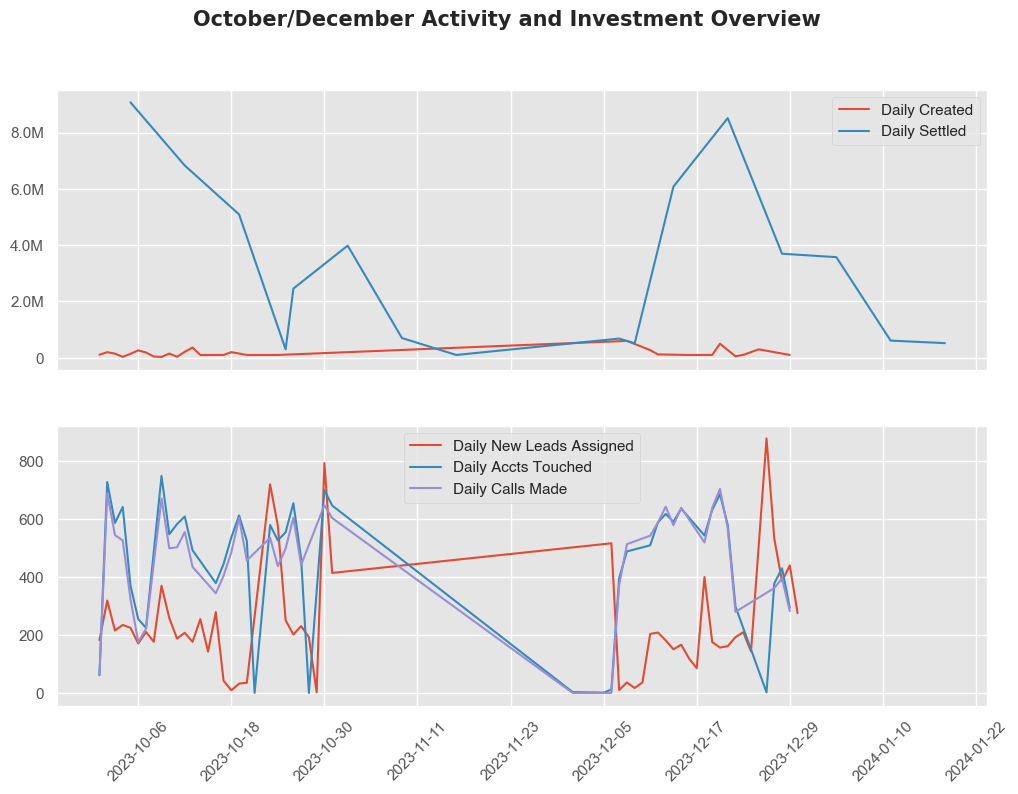

In [22]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(2,1, sharex=True, figsize=(12, 8), sharey=False)
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Helvetica'

    fig.suptitle('October/December Activity and Investment Overview',fontweight="extra bold", fontsize=15, fontfamily='DejaVu Sans' )
    ax[0].plot(created_group_sum['Investment: Created Date'], created_group_sum['Total Investment'])
    ax[0].plot(settled_group_sum['Close Date'], settled_group_sum['Total Investment'])
    ax[0].legend(['Daily Created', 'Daily Settled'], loc=0)

    ax[1].plot(newlead_group_overview['Edit Date'], newlead_group_overview['Account ID'])
    ax[1].plot(accts_touched_group_overview['Edit Date'], accts_touched_group_overview['Account ID'])
    ax[1].plot(phone_group_overview['Date'], phone_group_overview['Phone'])
    ax[1].legend(['Daily New Leads Assigned', 'Daily Accts Touched', 'Daily Calls Made'], loc='upper center')

    ticks_ax0 = ax[0].get_yticks()
    new_labels0 = [format_number(int(x)) for x in ticks_ax0]
    ax[0].set(yticklabels=new_labels0) 
    ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=12))
    plt.xticks(rotation=45)

    plt.show()
    save_filename = 'MoM Analysis - Oct-Dec.pdf'
    with PdfPages(save_filename) as pdf:
        pdf.savefig(fig, bbox_inches='tight')
 

In [23]:
path = 'C:\\Users\\Hannah Nevel\\Documents\\Weekly Reporting - CM\\Reporting for Andy'
todays_date = str(date.today())
save_filename = 'MoM Analysis Oct-Dec - ' + todays_date + '.pdf'
filepath = path + '\\' +save_filename

unique_filename = cf.write_unique_file(filepath)
with PdfPages(unique_filename) as pdf:
    pdf.savefig(fig, bbox_inches='tight')
